# Aula 12 - APIS

A sigla API deriva da expressão inglesa *Application Programming Interface* que, traduzida para o português, pode ser compreendida como uma interface de programação de aplicação. Ou seja, API é um conjunto de normas que possibilita a comunicação entre plataformas através de uma série de padrões e protocolos.

Dessa forma, existem muitas APIs criadas para fornecer dados a outros programas. De forma geral mandamos uma requisição de alguma forma para a API e ela nos retorno algo (podemos também mandar requisições para realizar alterações, etc...porém não é o escopo desta aula.)

Uma requisição pode ser feita simplesmente por meio de um URL. Considere a API do OSRM (opensource routing machine), que fornece informações geográficas por meio de sua API. Por meio da seguinte URL:

`http://router.project-osrm.org/route/v1/driving/13.388860,52.517037;13.397634,52.529407;13.428555,52.523219?overview=false`

Conseguimos acessar as distâncias entre as 3 localizações (longitude,latitude) contidas na URL. A resposta vem em um formato chamado *JSON* (isso depende da API e dos parâmetros passados). Com esse formato, conseguimos extrair os dados necessário.

Podemos visualizar os elementos de um arquivo JSON em um visualizador online para simplificação. Considere a resposta da API acima, insira a mesma no seguinte site (http://jsonviewer.stack.hu/), e veja como a informações está estruturada.

## 12.1 - Fazendo requisições de API em Python

Para coeltarmos a mesma informação acima direto do nosso programa em Python, precisamos usar a bibliteca `requests`, junto a função `get`. Abaixo segue um exemplo de uso em que são coletados dados da API (https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL), que retorna cotações atualizadas de moedas.

In [2]:
import requests as rq

# awesome api
respostas = rq.get("https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL")

# As respostas estão em um json que está dentro de respostas
respostas.json()['USDBRL']

{'code': 'USD',
 'codein': 'BRL',
 'name': 'Dólar Americano/Real Brasileiro',
 'high': '5.3096',
 'low': '5.2459',
 'varBid': '0.0077',
 'pctChange': '0.15',
 'bid': '5.2541',
 'ask': '5.2553',
 'timestamp': '1663361997',
 'create_date': '2022-09-16 17:59:57'}

## 12.2 - Exemplos de APIS em Python

API que fornece a hora atualizada (http://worldtimeapi.org):

### Horário mundial

In [10]:
# World time API
respostas = rq.get("http://worldtimeapi.org/api/timezone/America/Sao_Paulo")
respostas.json()["datetime"]

'2022-09-14T17:39:18.426733-03:00'

### Geoprocessamento/ matriz de distancias
API que fornece a matriz de distância entre pontos geográficos (http://router.project-osrm.org):

In [34]:
# OSRM
respostas = rq.get('http://router.project-osrm.org/table/v1/driving/-49.26742667248318,-25.43800114521021;-49.28340001503319,-25.444143212549957?annotations=distance,duration')
M = respostas.json()["distances"]
M

[[0, 3146.4], [2059.4, 0]]

### Mapas do gogole maps
API do google (precisa de uma chave), que busca um mapa estático.

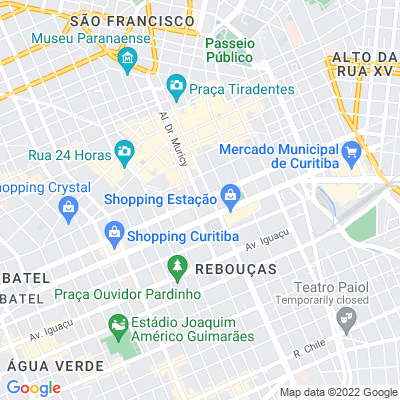

In [3]:

local = "Curitiba,Brazil"
chave = "XXXXXXXXXXXXXXXXXXXXXXX"
respostas = rq.get("https://maps.googleapis.com/maps/api/staticmap?center=" + local + "&zoom=14&size=400x400&key=" + chaveXXXXXXXXXXXXXXXXXXXXXXX)

# Abre um arquivo para salvar o conteúdo
f = open(r'G:\Meu Drive\Arquivos\UFPR\Disciplinas\2 - Intro  Mineração de Dados\file.jpeg', 'wb') 
f.write(respostas.content)
f.close()

# Abre a imagem
from IPython import display
display.Image(r'G:\Meu Drive\Arquivos\UFPR\Disciplinas\2 - Intro  Mineração de Dados\file.jpeg')


### Dados do governo federal (propostas da camara dos deputados deferais)
API do governo que fornece dados da camara dos deputados (https://dadosabertos.camara.leg.br).

In [11]:
# https://api.siorg.economia.gov.br/
respostas = rq.get("http://estruturaorganizacional.dados.gov.br/doc/estrutura-organizacional/resumida?codigoPoder=1&codigoEsfera=1&codigoUnidade=26&retornarOrgaoEntidadeVinculados=SIM")
respostas.json()["servico"]

{'codigoErro': 0,
 'mensagem': 'Processamento sem erros',
 'data': '2022-09-17',
 'versaoServico': '3.10.0',
 'ipRequisitante': '191.245.173.207',
 'ticket': None}

In [10]:
# https://dadosabertos.camara.leg.br/#
respostas = rq.get("https://dadosabertos.camara.leg.br/api/v2/eventos?ordem=ASC&ordenarPor=dataHoraInicio", headers={"accept": "application/json"})
respostas.json()["dados"][0]

{'id': 66366,
 'uri': 'https://dadosabertos.camara.leg.br/api/v2/eventos/66366',
 'dataHoraInicio': '2022-09-14T14:00',
 'dataHoraFim': None,
 'situacao': 'Convocada',
 'descricaoTipo': 'Audiência Pública',
 'descricao': 'Vacinação das pessoas com diabetes e com obesidade\r\n REUNIÃO CONJUNTA',
 'localExterno': None,
 'orgaos': [{'id': 2014,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/orgaos/2014',
   'sigla': 'CSSF',
   'nome': 'Comissão de Seguridade Social e Família',
   'apelido': 'Seguridade Social e Família',
   'codTipoOrgao': 2,
   'tipoOrgao': 'Comissão Permanente',
   'nomePublicacao': 'Comissão de Seguridade Social e Família',
   'nomeResumido': 'Seguridade Social'},
  {'id': 537871,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/orgaos/537871',
   'sigla': 'CIDOSO',
   'nome': 'Comissão de Defesa dos Direitos da Pessoa Idosa',
   'apelido': 'Defesa dos Direitos da Pessoa Idosa',
   'codTipoOrgao': 2,
   'tipoOrgao': 'Comissão Permanente',
   'nomePublicacao':

### Mercado de ações
Para coletar dados de ações podemos usar o próprio pacote do pandas `datareader`.

In [4]:
import pandas as pd 
from pandas_datareader import data as web 

# Bovespa
df = web.DataReader(f'^BVSP', data_source='yahoo', start=f'02-20-2020', end='02-20-2021')
print(df)

# Facebook
df2 = web.DataReader("FB", data_source='yahoo', start=f'08-20-2020', end='12-20-2020')
print(df2)

# Alcoa corporation
df3 = web.DataReader("AA", data_source='yahoo', start=f'08-20-2020', end='12-20-2020')
print(df3)

              High     Low    Open   Close    Volume  Adj Close
Date                                                           
2020-02-20  116552  114379  116518  114586   6793000     114586
2020-02-21  114585  112661  114585  113681   5896200     113681
2020-02-26  113647  105053  113647  105718   9369800     105718
2020-02-27  106656  102984  105711  102984  11237700     102984
2020-02-28  104172   99951  102984  104172  11228400     104172
...            ...     ...     ...     ...       ...        ...
2021-02-11  120283  118440  118440  119235   7567400     119235
2021-02-12  119763  118163  119300  119116   7655900     119116
2021-02-17  120573  118880  119421  120391   8326100     120391
2021-02-18  120845  118515  120361  119140  10720600     119140
2021-02-19  119250  117867  119199  118748  10402800     118748

[245 rows x 6 columns]
                  High         Low        Open       Close    Volume  \
Date                                                                   
